In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
from sklearn.model_selection import train_test_split
import time
import os

## CohnKanade Dataset

In [2]:
emotions_folder = '/Users/Arash/Downloads/Open Data/Facial Expression/CohnKanade +/Emotion'
images_folder = '/Users/Arash/Downloads/Open Data/Facial Expression/CohnKanade +/cohn-kanade-images'

emotions_file_list = []
images_file_list = []

for subdir, dirs, files in os.walk(emotions_folder):
    for file in files:
        filepath = subdir + os.sep + file

        if filepath.endswith(".txt"):
            
            filepath_emotion = filepath
            emotions_file_list.append(filepath)
            
            filepath_image = filepath.replace('Emotion', 'cohn-kanade-images')\
                                        .replace('txt', 'png')\
                                            .replace('_emotion','')
            images_file_list.append(filepath_image)

In [3]:
expressions = []

for filepath in emotions_file_list:
    exp = np.asscalar(np.loadtxt(filepath, dtype='int8'))
    expressions.append(exp)

expressions = np.asarray(expressions)

In [4]:
np.unique(expressions)

array([1, 2, 3, 4, 5, 6, 7])

In [5]:
images = []

for filepath in images_file_list:
    im = plt.imread(filepath)
    
    if len(im.shape) == 3:        # Converting to greyscale
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    if im.shape != (490, 640):    # Resizing to 490 x 640
        im = cv2.resize(im, (640, 490))

    im_reshaped = im.reshape(-1)
    images.append(im_reshaped) 
    
images = np.asarray(images)

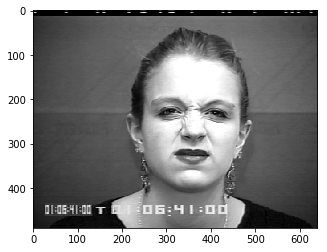

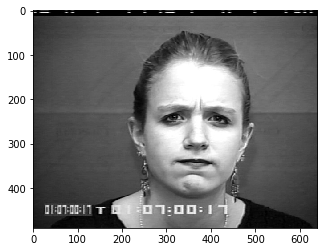

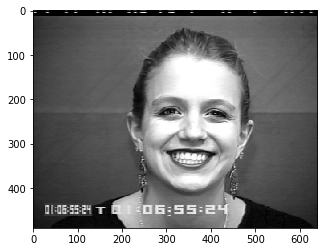

In [6]:
for image in images[50:53]:
    plt.imshow(image.reshape((490, 640)), cmap = 'gray')
    plt.show()

In [7]:
print(f'Shape of images: {images.shape}')
print(f'Shape of expressions: {expressions.shape}')

Shape of images: (327, 313600)
Shape of expressions: (327,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, expressions, 
                                                    test_size=0.3, random_state=1, stratify = expressions)

In [9]:
print(f'Shape of training X:\t {X_train.shape}')
print(f'Shape of training y:\t {y_train.shape}')
print(f'Shape of test X:\t {X_test.shape}')
print(f'Shape of test y:\t {y_test.shape}')

Shape of training X:	 (228, 313600)
Shape of training y:	 (228,)
Shape of test X:	 (99, 313600)
Shape of test y:	 (99,)


In [ ]:
from sklearn.svm import SVC

my_kernel_SVM = SVC(kernel='rbf', gamma = 5, C = 1, random_state = 1)
my_kernel_SVM.fit(X_train, y_train)

print(f"The accuracy on training set is:\t{my_kernel_SVM.score(X_train,y_train):0.3}")
print(f"The accuracy on test set is:\t\t{my_kernel_SVM.score(X_test,y_test):0.3}")

In [ ]:
import cv2 as cv

# Read image from local file
original_image = cv.imread('/Users/Arash/Desktop/BrainStation/Capstone/S112_004_00000016.png')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier('/Users/Arash/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

# Using detectMultiScale() to run the classifier cascade over the image and look
# at subregions of the image in multiple scales, to detect faces of varying sizes:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

for (column, row, width, height) in detected_faces:
    cv.rectangle(original_image, (column, row), (column + width, row + height), (255, 0, 0), 3)
    
    
plt.imshow(original_image)

In [14]:
images = []

for filepath in images_file_list:
    im = original_image = cv.imread(filepath)
    
    if len(im.shape) == 3:        # Converting to greyscale
        im = cv.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    if im.shape != (490, 640):    # Resizing to 490 x 640
        im = cv.resize(im, (640, 490))

    images.append(im) 

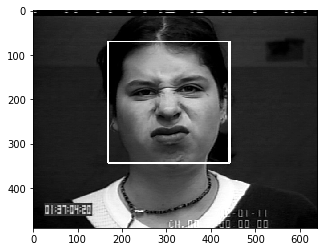

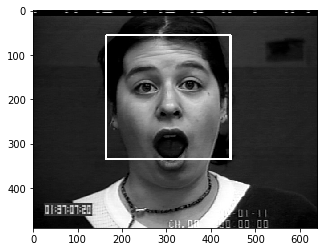

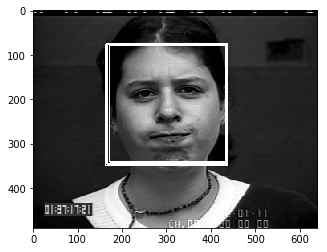

In [18]:
face_cascade = cv.CascadeClassifier('/Users/Arash/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

for image in images[0:3]:
    
    original_image = image
    
    detected_faces = face_cascade.detectMultiScale(original_image)

    for (column, row, width, height) in detected_faces:
        cv.rectangle(original_image, (column, row), (column + width, row + height), (255, 0, 0), 2)
    plt.imshow(original_image,cmap = 'gray')
    plt.show()

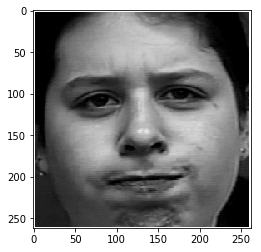

In [19]:
plt.imshow(original_image[row:row + height, column:column + width],cmap = 'gray')

## Face Detector

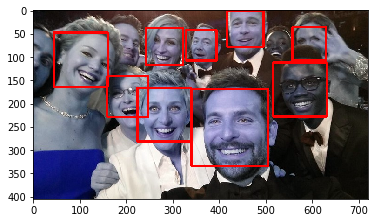

In [20]:
import cv2 as cv

# Read image from local file
original_image = cv.imread('/Users/Arash/Downloads/lead_720_405.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier('/Users/Arash/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

# Using detectMultiScale() to run the classifier cascade over the image and look
# at subregions of the image in multiple scales, to detect faces of varying sizes:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

for (column, row, width, height) in detected_faces:
    cv.rectangle(original_image, (column, row), (column + width, row + height), (255, 0, 0), 3)
    
    
plt.imshow(original_image)

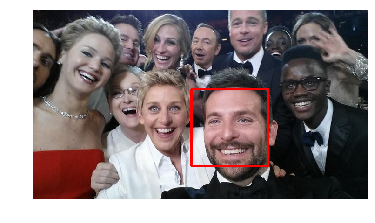

In [21]:
import cv2 as cv

# Read image from local file
original_image = cv.imread('/Users/Arash/Downloads/lead_720_405.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier('/Users/Arash/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

# Using detectMultiScale() to run the classifier cascade over the image and look
# at subregions of the image in multiple scales, to detect faces of varying sizes:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

column, row, width, height = detected_faces[np.argmax(detected_faces[:,2])]
    
cv.rectangle(original_image, (column, row), (column + width, row + height), (0, 0, 255), 3)
    
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off");

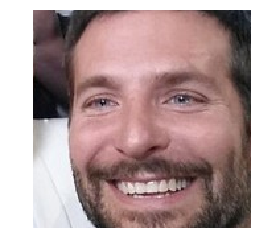

In [22]:
import cv2 as cv

# Read image from local file
original_image = cv.imread('/Users/Arash/Downloads/lead_720_405.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier('/Users/Arash/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

# Using detectMultiScale() to run the classifier cascade over the image and look
# at subregions of the image in multiple scales, to detect faces of varying sizes:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

column, row, width, height = detected_faces[np.argmax(detected_faces[:,2])]
        
plt.imshow(cv2.cvtColor(original_image[row:row + height, column:column + width], cv2.COLOR_BGR2RGB))
plt.axis("off");

## CNN

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

def random_mini_batches(X, Y, mini_batch_size = 100, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction






def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, (None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32, (None, n_y))
    ### END CODE HERE ###
    
    return X, Y

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [4, 4, 1, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [4, 4, 8, 16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 6, activation_fn=None)
    ### END CODE HERE ###

    return Z3

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    ### END CODE HERE ###
    
    return cost

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
          num_epochs = 20, minibatch_size = 10, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 2 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters
    



Cost after epoch 0: 2.455150
Cost after epoch 2: 1.768670
Cost after epoch 4: 1.691701
Cost after epoch 6: 1.274667
Cost after epoch 8: 0.885388
Cost after epoch 10: 0.495584
Cost after epoch 12: 0.350459
Cost after epoch 14: 0.301284
Cost after epoch 16: 0.217256
Cost after epoch 18: 0.261592


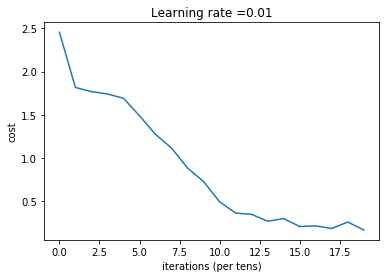

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.97209305
Test Accuracy: 0.10638298


In [19]:
X_train_CNN = X_train[np.isin(y_train, [1,3,4,5,6,7])].reshape(X_train[np.isin(y_train, [1,3,4,5,6,7])].shape[0], 490, 640, 1)
X_test_CNN = X_test[np.isin(y_test, [1,3,4,5,6,7])].reshape(X_test[np.isin(y_test, [1,3,4,5,6,7])].shape[0], 490, 640, 1)
y_train_CNN = np.asarray(pd.get_dummies(y_train[np.isin(y_train, [1,3,4,5,6,7])]))
y_test_CNN = np.asarray(pd.get_dummies(y_test[np.isin(y_test, [1,3,4,5,6,7])]))

_, _, parameters = model(X_train_CNN, y_train_CNN, X_test_CNN, y_test_CNN)

In [37]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([31, 13, 41, 17, 48, 20, 58]))

In [40]:
X_train[np.isin(y_train, [1,3,4,5,6,7])].shape

(215, 313600)